# Mini projects

## Level 1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Photo art app

1. Create a function that receives an image and converts it to a sketch so it looks similar to this:
![Example 1](img/sketch.png)

### Instagram filters app

1. Create a function that given a photo it applies a black and white filter
1. Create a filter that will change color of the image 

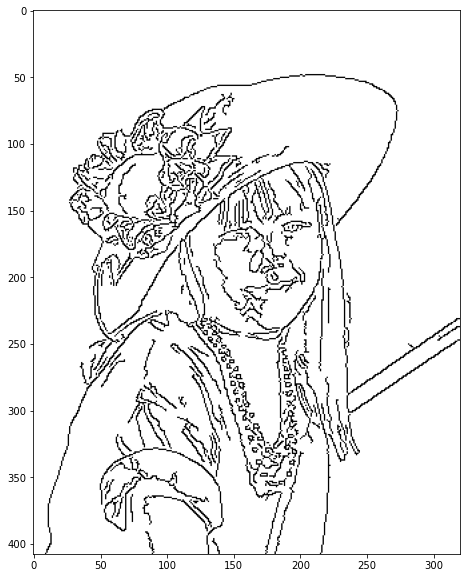

In [3]:
def sketching(imgpath):
    img = cv2.imread(imgpath)
    img_blur = cv2.GaussianBlur(img, (5,5), 0)
    sketch = cv2.Canny(img_blur, 100, 200)
    sketch_not = cv2.bitwise_not(sketch)

    plt.figure(figsize=(10,10))
    plt.imshow(sketch_not, cmap='gray')
    
sketching('./img/noisy.png')

## Level 2

### Photo art app

1. Change the app so it can now do the same but using your webcam to make it in real time  
**Hint:** you can use ```cv2.VideoCapture(0)```

In [22]:
def video_sketching():
    cap = cv2.VideoCapture(0)

    while(True): 
        ret, frame = cap.read()
        img = frame.copy()
        img_blur = cv2.GaussianBlur(img, (3,3), 0)
        sketch = cv2.Canny(img_blur, 50, 150)
        sketch_not = cv2.bitwise_not(sketch) 
  
        # displaying the video 
        cv2.imshow("Sketch", sketch_not) 

        # exiting the loop 
        key = cv2.waitKey(1) 
        if key == ord("q"): 
            break

    # closing the window 
    cv2.destroyAllWindows() 
    cap.release()
    
video_sketching()

### Photo correction app

1. Create a funtion to clean *noise* from images
![Noisy image](img/n.png)

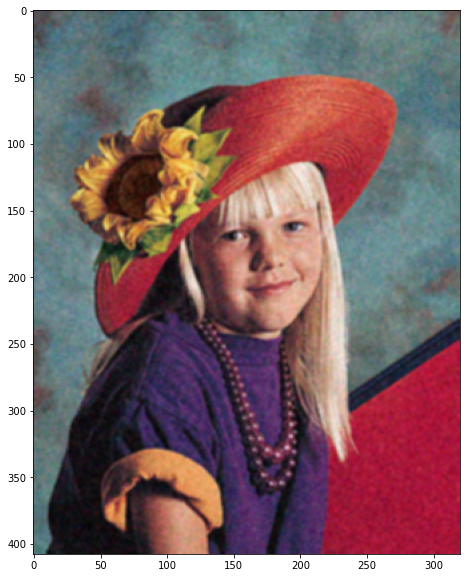

In [5]:
def noise_cleaning(imgpath):
    img = cv2.imread(imgpath)

    gaussian_img = cv2.GaussianBlur(img, (5,5), 0)
    
    
    plt.figure(figsize=(10,10))
    plt.imshow((gaussian_img[:,:,::-1]))
    
noise_cleaning('./img/noisy.png')

### Instagram filters app

1. Create a function that applies a sepia filter to the image, for a BGR image apply this kernel:
        [0.272, 0.534, 0.131],
        [0.349, 0.686, 0.168],
        [0.393, 0.769, 0.189]
        
Get the BGR value of the pixel.
Calculate tr, tg and tb using the formula

tb = 0.272R + 0.534G + 0.131B
tg = 0.349R + 0.686G + 0.168B
tr = 0.393R + 0.769G + 0.189B

Take the integer value.

Set the new RGB value of the pixel as per the following condition:

If tb > 255 then b = 255 else b = tb
If tg > 255 then g = 255 else g = tg
If tr > 255 then r = 255 else r = tr


Example:

Consider a color pixel with the following values

A = 255

R = 100

G = 150

B = 200

Where A, R, G and B represents the Alpha, Red, Green and Blue value of the pixel.

Remember! ARGB will have an integer value in the range 0 to 255.

So, to convert the color pixel into sepia pixel we have to first calculate tr, tg and tb.

tr = 0.393(100) + 0.769(150) + 0.189(200)

tr = 192.45

tr = 192 (taking integer value)

Similarly,

tg = 0.349(100) + 0.686(150) + 0.168(200) = 171 (taking integer value)

and tb = 0.272(100) + 0.534(150) + 0.131(200) = 133 (taking integer value)

## Level 3

### Instagram filters app

1. Apply the sepia filter by using the cv2.transfor function
1. Create different filters from the sepia filter so it renders different images

# More projects

## Handwriting recognition

1. Write a one digit number (from 0 to 9) on a paper and using your mobile phone take a picture of it
1. Crop the image manually and pass it to a a function that will process it so it looks like a char in the MNIST dataset, make sure it is the correct size as well
![4](img/4.png)

1. Pass it through a MNIST classifier and print the prediction on screen

1. Modify the image so now it also contains the predicted result on the image
1. Try it with all digits

In [2]:
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

from torchvision import datasets, transforms

In [3]:
class Strive_Network(nn.Module):
    
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32,8 )
        self.fc4 = nn.Linear(8, 10)
        
    # Forward pass through the network, returns the output logits
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.softmax(x,dim=1)
        return x

model = Strive_Network()

In [4]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [5]:
model = Strive_Network()
save_path = "./model.pth"
model.load_state_dict(torch.load(save_path))
model

Strive_Network(
  (fc1): Linear(in_features=784, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=10, bias=True)
)

In [6]:
from Tensify import Tensify

In [10]:
test = Tensify.imagify("./img/","1.jpg")
t = Tensify.tensed(test)


TypeError: Image data of dtype <U11 cannot be converted to float

In [20]:
with torch.no_grad():
    ps = model(t)

In [21]:
ps

tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])